In [139]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
from h5py import *

In [247]:
# function exemplary
def make_perm_grid(max, min, factor, ncells, size):
    length_cells = size / ncells

    fct_sin = lambda x : (max - min)/2 * np.sin(x/factor) + (max + min)/2
    fct_cos = lambda x : (max - min)/2 * np.cos(x/factor) + (max + min)/2
    
    icells = [np.linspace(1, ncells[i], ncells[i]) for i in (0,1,2)]
    idx, idy, idz = np.meshgrid(icells[1], icells[0], icells[2])
    cells = (fct_cos(idx*length_cells[0])+fct_cos(idy*length_cells[1])+fct_cos(idz*length_cells[2]))/3
    return cells, icells

def save_perm(filename, ncells, cells):
    n = ncells[0] * ncells[1] * ncells[2]
    cells_array_flatten = cells.reshape(n, order='F')

    h5file = File(filename,mode='w')

    # create integer array for cell ids
    iarray = np.arange(n,dtype='u8')
    # convert to 1-based
    iarray[:] += 1
    dataset_name = 'Cell Ids'
    h5dset = h5file.create_dataset(dataset_name, data=iarray)

    # create double array for porosities
    # rarray = np.zeros(n,dtype='f8')
    # rarray[:] = 0.25
    # rarray[4:7] = 0.3
    dataset_name = 'Permeability'
    h5dset = h5file.create_dataset(dataset_name, data=cells_array_flatten)

    h5file.close()

In [250]:
# size = np.array([500, 1000, 30])
size = np.array([100, 500, 30])
# ncells = np.array([75, 150, 12])
ncells = np.array([20, 150, 12])
perm_max = 6.65*10**-9
perm_min = 1.36*10**-12
factor = 40

if True:
    cells, icells = make_perm_grid(perm_max, perm_min, factor, ncells, size)
else:
    fct_exp = lambda x: 10**x
    log_max = np.log10(perm_max)
    log_min = np.log10(perm_min)

    cells, icells = make_perm_grid(log_max, log_min, factor, ncells, size)
    cells = fct_exp(cells) 
print(cells.mean())
print(4.945257360631013e-09 == cells.mean())

4.945257360631013e-09
True


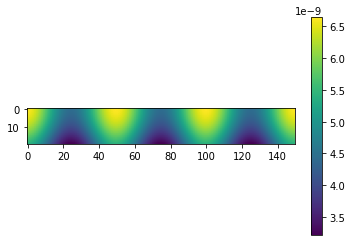

In [244]:
# 2d plot of the permeability field
plt.imshow(cells[:,:,0])
plt.colorbar()
plt.show()

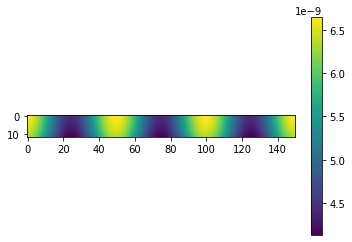

In [245]:
# 2d plot of the permeability field
plt.imshow(cells[0,:,:].T)
plt.colorbar()
plt.show()

In [246]:
filename = 'permeability.h5'
save_perm(filename, ncells, cells)

In [192]:
# # read hdf5 file
# h5file_compare = File("543_initial_pressure.h5",mode='r')
# # print header in h5 file
# print(h5file_compare.keys())
# print(h5file_compare['Cell Ids'])
# print(h5file_compare['Cell Ids'][:])
# print(h5file_compare['Pressure'])
# print(h5file_compare['Pressure'][:])

In [193]:
# # read h5 perm file
# h5file = File("permeability.h5",mode='r')

# # print header in h5 file
# print(h5file.keys())
# print(h5file['Cell Ids'])
# print(h5file['Cell Ids'][:])
# print(h5file['Permeability'])
# print(h5file['Permeability'][:])

# h5file.close()

# create random, smoothed permeability field

In [251]:
# get random points, set random value at these points
nbases = 10

def get_random_bases(nbases, icells, value_max, value_min):
    bases = []
    for _ in range(nbases):
        point = {}
        point['ids'] = [np.random.choice(icells[i]) for i in (0,1,2)]
        # set random value at these points
        point['permeability'] = np.random.uniform(value_min, value_max) #TODO !! mittendrin, HIER BIN IHC GRAD DRAN
        print(point)
        bases.append(point)

    return bases

get_random_bases(nbases, icells, perm_max, perm_min)

# interpolate / extrapolate rest of domain

{'ids': [16.0, 25.0, 12.0], 'permeability': 4.13110260016882e-09}
{'ids': [18.0, 80.0, 3.0], 'permeability': 1.984918865244677e-09}
{'ids': [5.0, 89.0, 5.0], 'permeability': 3.0453025393235827e-10}
{'ids': [3.0, 150.0, 5.0], 'permeability': 3.692325947486453e-09}
{'ids': [4.0, 141.0, 9.0], 'permeability': 1.0607077911254061e-09}
{'ids': [9.0, 128.0, 1.0], 'permeability': 2.5519081552862457e-09}
{'ids': [4.0, 134.0, 7.0], 'permeability': 2.4762735863939643e-09}
{'ids': [17.0, 81.0, 3.0], 'permeability': 5.5308295896906895e-09}
{'ids': [2.0, 118.0, 2.0], 'permeability': 1.9633294350433084e-09}
{'ids': [15.0, 50.0, 4.0], 'permeability': 7.717431247639937e-10}


[{'ids': [16.0, 25.0, 12.0], 'permeability': 4.13110260016882e-09},
 {'ids': [18.0, 80.0, 3.0], 'permeability': 1.984918865244677e-09},
 {'ids': [5.0, 89.0, 5.0], 'permeability': 3.0453025393235827e-10},
 {'ids': [3.0, 150.0, 5.0], 'permeability': 3.692325947486453e-09},
 {'ids': [4.0, 141.0, 9.0], 'permeability': 1.0607077911254061e-09},
 {'ids': [9.0, 128.0, 1.0], 'permeability': 2.5519081552862457e-09},
 {'ids': [4.0, 134.0, 7.0], 'permeability': 2.4762735863939643e-09},
 {'ids': [17.0, 81.0, 3.0], 'permeability': 5.5308295896906895e-09},
 {'ids': [2.0, 118.0, 2.0], 'permeability': 1.9633294350433084e-09},
 {'ids': [15.0, 50.0, 4.0], 'permeability': 7.717431247639937e-10}]